In [46]:
# this file is for data prepocessing:
# clean the original Twitter texts

# import
import re
import pandas as pd 
import numpy as np 
from wordcloud import WordCloud
from google.colab import drive
from collections import Counter
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('twitterA_train_data.txt', sep="\t",names=['Number','Label','Text'])
df

,Number,Label,Text
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...
1,628976607420645377,negative,@Microsoft how about you make a system that do...
2,629023169169518592,negative,I may be ignorant on this issue but... should ...
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ..."
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...
...,...,...,...
15547,103158179306807296,positive,RT @MNFootNg It's monday and Monday Night Foot...
15548,103157324096618497,positive,All I know is the road for that Lomardi start ...
15549,100259220338905089,neutral,"All Blue and White fam, we r meeting at Golden..."
15550,104230318525001729,positive,@DariusButler28 Have a great game agaist Tam...


In [74]:
def remove_handles(input):
    for i in re.findall("@[\w]*|#[\w]*", input):
      input = re.sub(i, '', input)
    # for i in re.findall("#[\w]*", input):
    #   input = re.sub(i, '', input)
    return input 


def data_prepocessing(df):
  # remove twitter sentences in @xxx or #xxx format
  df['handles_removed'] = np.vectorize(remove_handles)(df['Text'])

  # remove special characters, numbers, punctuations
  df['spec_char_removed'] = df['handles_removed'].str.replace("[^a-zA-Z#]", " ")

  # remove world with length<=2
  df['tidy'] = df['spec_char_removed'].apply(lambda x: ' '.join([i for i in x.split(" ") if len(i)>2]))

  return df

In [134]:
# data exploration
def data_exploration(df):

  # Labels:
  print("Label Distribuition")
  counter = Counter(df.Label)
  plt.figure(figsize=(5,3))
  plt.bar(counter.keys(), counter.values())
  print(counter.keys())
  print(counter.values())
  plt.title("Labels Distribuition")

  # word cloud
  all_words = ' '.join([text for text in df['tidy']])
  wordcloud = WordCloud(width=300, height=200, random_state=21, max_font_size=50).generate(all_words)
  plt.figure(figsize=(8, 5))
  plt.imshow(wordcloud)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.show()

  # max length of twitter
  documents = [_text.split() for _text in df.Text] 
  max_len = 0
  for _text in df.Text:
    token = [t for t in _text.split()]
    max_len = len(token) if max_len > len(token) else max_len
  # print("Max Twitter Length:")
  # print(max_len)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


Label Distribuition
dict_keys(['negative', 'neutral', 'positive'])
dict_values([2308, 6587, 6657])


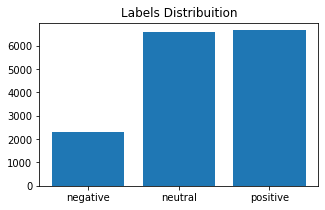

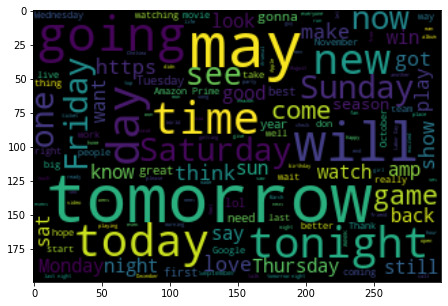

Max Twitter Length:
0


In [137]:
# main:

# data prepocessing
df_new = data_prepocessing(df)
df_new.head(5)
df_new.to_csv("dataA_tidy.csv")

# data exploration
data_exploration(df_new)